# Run through the physio sync procedure I'm proposing for phys2bids

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from bids import BIDSLayout
import json
import pandas as pd
import numpy as np
import os.path as op

np.set_printoptions(suppress=True)

from phys2bids import conversion
from phys2bids.interfaces.acq import populate_phys_input

In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
physio_file = '/Users/tsalo/Documents/Laird_DIVA/sourcedata/biopac/sub-Blossom_ses-02.acq'
bids_dir = '/Users/tsalo/Documents/Laird_DIVA/dset/'
physio = populate_phys_input(physio_file, chtrig=4)
print(physio.ch_name)

['time', 'ECG100C - ECG100C', 'DA100C - TSD221-MRI - Respiration Trans', 'EDA100C - EDA100C-MRI', 'Trigger']


In [3]:
physio.rename_channels(['cardiac', 'respiration', 'electrodermal', 'trigger'])

/Users/tsalo/Documents/tsalo/pybids/bids/layout/models.py:102: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  FutureWarning)


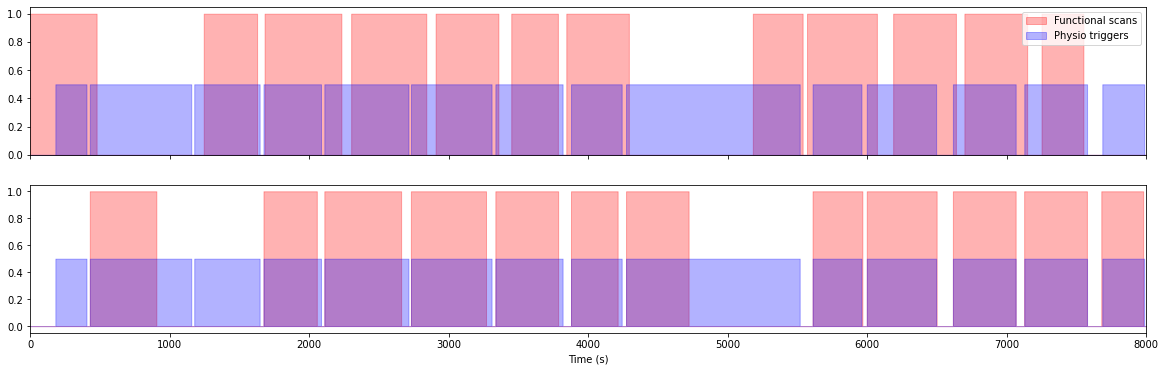

In [4]:
out = conversion.workflow(physio, bids_dir, sub='Blossom', ses='02', update_trigger=True)

In [5]:
[f.filename for f in out]

['/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02/func/sub-Blossom_ses-02_task-strangerthings_run-1_physio',
 '/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02/func/sub-Blossom_ses-02_task-strangerthings_run-2_physio',
 '/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02/func/sub-Blossom_ses-02_task-strangerthings_run-3_physio',
 '/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02/func/sub-Blossom_ses-02_task-strangerthings_run-4_physio',
 '/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02/func/sub-Blossom_ses-02_task-strangerthings_run-5_physio',
 '/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02/func/sub-Blossom_ses-02_task-strangerthings_run-6_physio',
 '/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02/func/sub-Blossom_ses-02_task-strangerthings_run-7_physio',
 '/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02/func/sub-Blossom_ses-02_task-PST_run-1_physio',
 '/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


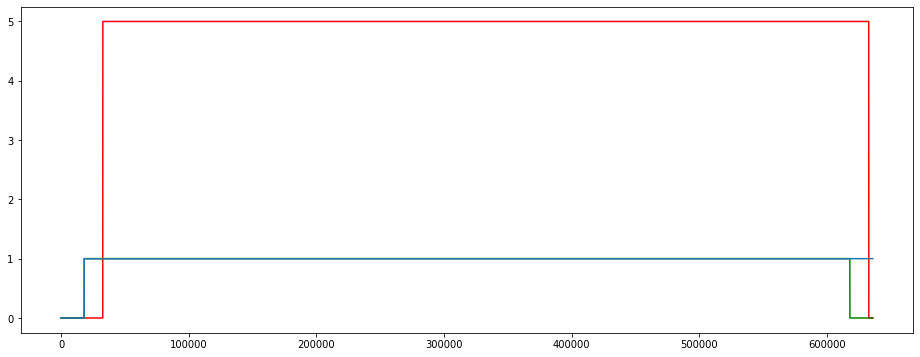

In [6]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(out[-1].timeseries[:, 5], color='red')
ax.plot(out[-1].timeseries[:, 4], color='green')
ax.plot(out[-1].timeseries[:, 0] > 0)
fig.show()

In [7]:
out[-1].ch_name

['time',
 'cardiac',
 'respiration',
 'electrodermal',
 'trigger',
 'original trigger']